In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 

In [7]:
red = pd.read_csv("/media/radial/Work/Work/Work on datasets/Wine_UCI/winequality-red.csv", delimiter=";")
red["color"] = "r"
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5     r  
1      9.8        5     r  
2      9.8        5     r  
3      9.8        6     r  
4      9.4        5     r

In [8]:
red.shape

(1599, 13)

In [9]:
white = pd.read_csv("/media/radial/Work/Work/Work on datasets/Wine_UCI/winequality-white.csv", delimiter=";")
white["color"] = "w"
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality color  
0      8.8        6     w  
1      9.5        6     w  
2     10.1        6     w  
3      9.9        6     w  
4      9.9        6     w

In [10]:
white.shape

(4898, 13)

In [12]:
df = pd.concat([red,white],axis=0)
df.shape

(6497, 13)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [18]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [19]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

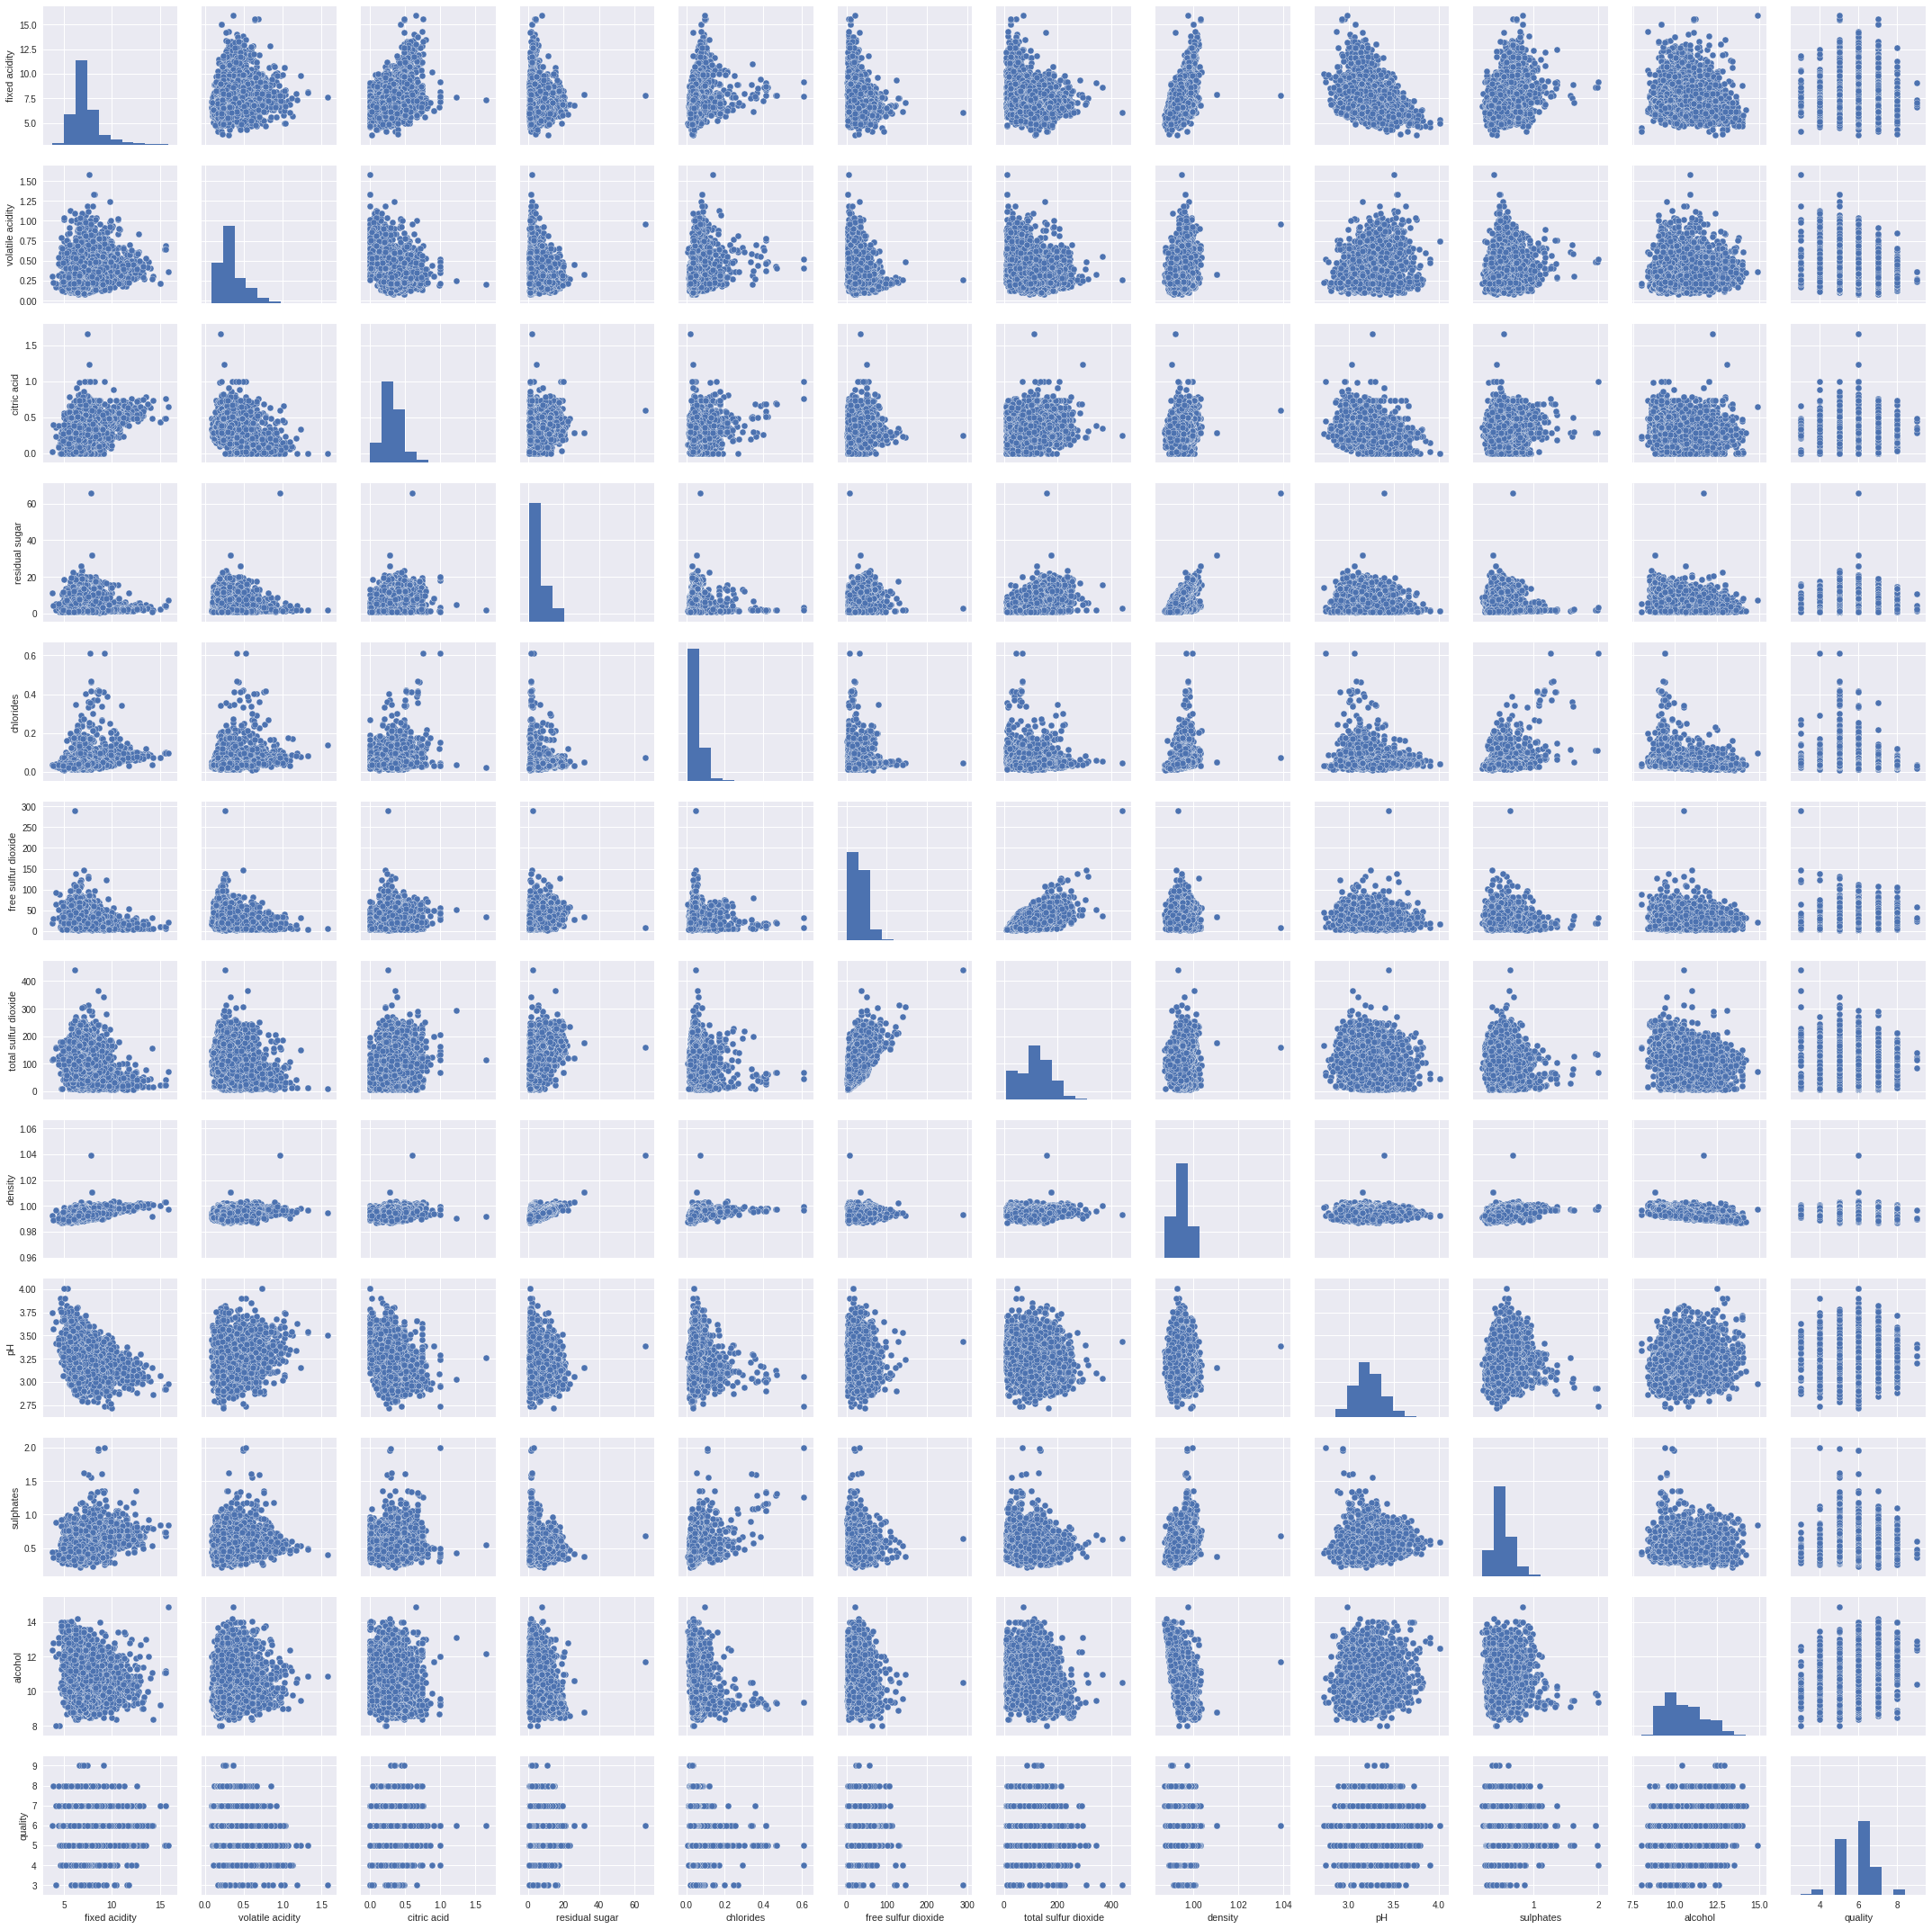

In [21]:
import seaborn as sns
sns.pairplot(df)

In [30]:
import sklearn.linear_model as sk_lm
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import random
random.seed(10)
from sklearn.utils import shuffle

In [26]:
import copy 
d_colorless = copy.deepcopy(df)
del d_colorless["color"]
d_colorless.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [38]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(d_colorless,df.color,test_size=497, random_state=101)
model_log = sk_lm.LogisticRegression(penalty = "l2",C=2,solver='lbfgs')
model_log.fit(x_train, y_train)
pred = model_log.predict(x_test)
exp=y_test
from sklearn import metrics
print(metrics.confusion_matrix(exp,pred))

[[121   6]
 [  5 365]]


In [39]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          r       0.96      0.95      0.96       127
          w       0.98      0.99      0.99       370

avg / total       0.98      0.98      0.98       497



In [40]:
?sk_lm.LogisticRegression

In [42]:
model_log = sk_lm.LogisticRegression(penalty = "l2",C=2,solver='newton-cg')
model_log.fit(x_train, y_train)
pred = model_log.predict(x_test)
exp=y_test
from sklearn import metrics
print(metrics.confusion_matrix(exp,pred))

[[121   6]
 [  4 366]]


In [43]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          r       0.97      0.95      0.96       127
          w       0.98      0.99      0.99       370

avg / total       0.98      0.98      0.98       497



In [62]:
model_log = sk_lm.LogisticRegression(penalty = "l2",C=2,solver='newton-cg', max_iter=28)
model_log.fit(x_train, y_train)
pred = model_log.predict(x_test)
exp=y_test
from sklearn import metrics
print(metrics.confusion_matrix(exp,pred))

[[122   5]
 [  3 367]]


/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [47]:
?sk_lm.LogisticRegression

In [63]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          r       0.98      0.96      0.97       127
          w       0.99      0.99      0.99       370

avg / total       0.98      0.98      0.98       497



In [ ]:
del d_qualless["color"]

In [90]:
df.columns = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality","color"]

In [91]:
d_qualless.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [92]:
import statsmodels.formula.api as smf
est = smf.ols('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', df).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [94]:
import statsmodels.formula.api as smf
est = smf.ols('quality ~ fixed_acidity+volatile_acidity+residual_sugar+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', df).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [97]:
X2 = df[["fixed_acidity","volatile_acidity","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]].as_matrix()
model_LR.fit(X2, df["quality"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

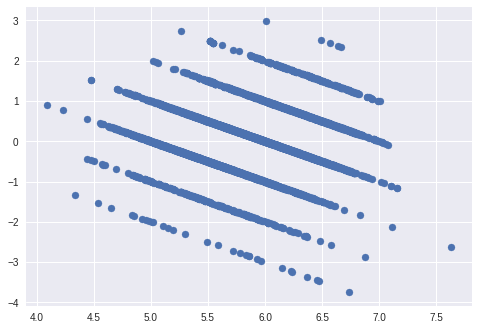

In [99]:
d_qualless['pred1'] = model_LR.predict(X2)
d_qualless['resid1'] = df.quality - d_qualless.pred1
plt.scatter(d_qualless.pred1,d_qualless.resid1)

In [104]:
for i in df.columns[:-2]:
    est_mpg = smf.ols('quality~{}'.format(i), df).fit()

    print("{}: ".format(i))
    print(1/(1-est_mpg.rsquared))

fixed_acidity: 
1.0059244119
volatile_acidity: 
1.075958602
citric_acid: 
1.00736958815
residual_sugar: 
1.00136942901
chlorides: 
1.04195607329
free_sulfur_dioxide: 
1.00308564277
total_sulfur_dioxide: 
1.00171569436
density: 
1.10320366436
pH: 
1.00038061729
sulphates: 
1.00148332654
alcohol: 
1.24598007458


In [112]:
?sk_lm.Lasso

In [115]:
model_lass = sk_lm.Lasso(alpha  = 0.1)
model_lass.fit(X2, df["quality"])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X2), df["quality"])
    coefs.append(ridge.coef_)

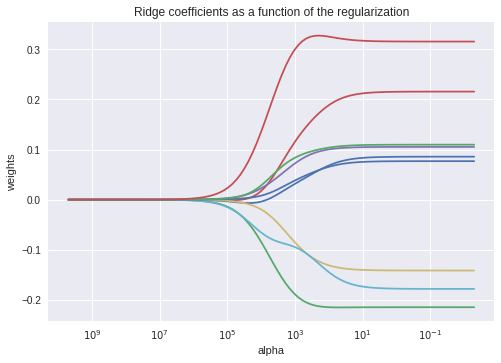

In [120]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

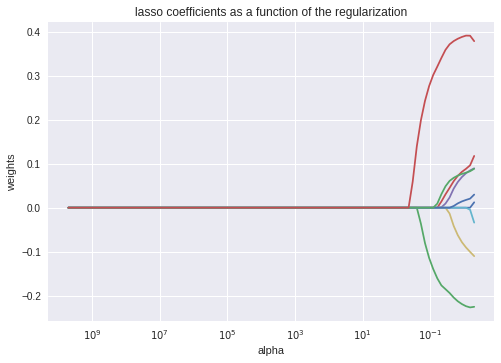

In [121]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X2), df["quality"])
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('lasso coefficients as a function of the regularization');

# TBC